In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook: # maquina virtual colab
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR  = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR    = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
    MODELOS_DIR  = '/content/drive/MyDrive/Colab Notebooks/MODELOS/'    # carpeta donde se encuentran los modelos
    ARCHIVOS_DIR = '/content/drive/MyDrive/Colab Notebooks/ARCHIVOS/'   # carpeta recuperar o copiar archivos
else: # maquina local ipython
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
    MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
    ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

# Ejercicio 1

El archivo Hawks.csv contiene mediciones de casi 900 aves de tres especies diferentes. Los datos registrados
son los siguientes:
-  Epecies. Es la etiqueta de clase e indica la especie de cada gavilán: gavilanes de Cooper (CH),
gavilanes colirrojos (RT) y gavilanes rastreros (SS).
- Año. Indica el año en que se avistó el ave.
- Hallux. Indica la medida en milímetros del hallux (el dedo posterior del pie, que poseen todas las
aves cazadoras para sujetar mejor a sus presas).
- Ala. Indica la longitud en milímetros de la pluma más larga del ala.
- Peso. Indica el peso del ave en gramos.
- Cola. Indica la longitud de la cola del ave en milímetros. 

In [2]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos


nombre_archivo = DATOS_DIR + 'Hawks.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe
# print(df)
display(df)

,Year,Species,Wing,Weight,Tail,Hallux,Coopers?,Red-tailed?,Sharp-shinned?
0,1992,RT,385.0,920.0,219,30.1,0,1,0
1,1992,RT,381.0,990.0,235,31.3,0,1,0
2,1992,CH,265.0,470.0,220,23.5,1,0,0
3,1992,RT,370.0,960.0,212,30.1,0,1,0
4,1992,RT,405.0,1120.0,238,30.2,0,1,0
...,...,...,...,...,...,...,...,...,...
442,2003,RT,362.0,840.0,206,26.1,0,1,0
443,2003,SS,190.0,200.0,157,15.0,0,0,1
444,2003,SS,197.0,185.0,157,15.6,0,0,1
445,2003,RT,360.0,1325.0,224,30.6,0,1,0


a. Calcule la correlación lineal entre los atributos Ala y Cola. Indique la intensidad de la correlación (no hay correlación/débil/fuerte) y el tipo (positiva/negativa)

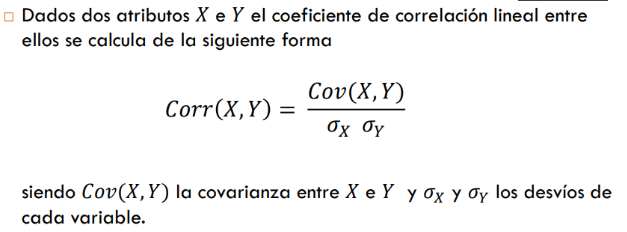

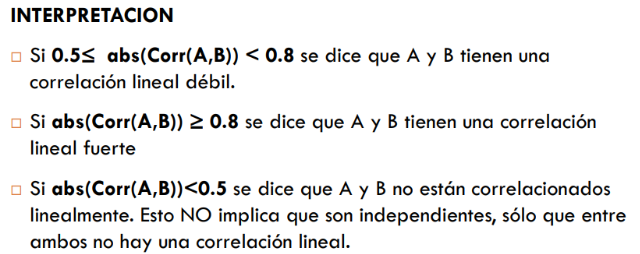

In [3]:
df.corr()


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_20684\1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Wing,Weight,Tail,Hallux,Coopers?,Red-tailed?,Sharp-shinned?
Year,1.000000,-0.216323,-0.169281,-0.205120,-0.142715,0.065757,-0.185757,0.159390
Wing,-0.216323,1.000000,0.941805,0.911765,0.678849,-0.228060,0.951762,-0.878601
Weight,-0.169281,0.941805,1.000000,0.886196,0.689608,-0.226018,0.931271,-0.858053
Tail,-0.205120,0.911765,0.886196,1.000000,0.657696,-0.021935,0.857582,-0.896100
Hallux,-0.142715,0.678849,0.689608,0.657696,1.000000,-0.100694,0.669744,-0.652279
Coopers?,0.065757,-0.228060,-0.226018,-0.021935,-0.100694,1.000000,-0.370102,-0.176861
Red-tailed?,-0.185757,0.951762,0.931271,0.857582,0.669744,-0.370102,1.000000,-0.848890
Sharp-shinned?,0.159390,-0.878601,-0.858053,-0.896100,-0.652279,-0.176861,-0.848890,1.000000


Vemos que la correlacion entre wing y tail es de 0.91

In [4]:
df['Tail'].corr(df['Wing'])

0.9117653735851498

In [5]:
data = {
    'Edad': ['Valor', 'Intensidad', 'Tipo'],
    'B': ['0.911', 'Fuerte', 'Positiva'],
    'Examen': [' ', ' ', ' ']
}

df_tabla = pd.DataFrame(data)
df_tabla

,Edad,B,Examen
0,Valor,0.911,
1,Intensidad,Fuerte,
2,Tipo,Positiva,


b. Complete el cuadro con los valores del atributo Hallux antes y después de normalizarlos utilizando media y desvío. 

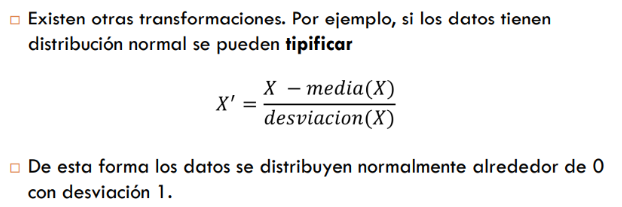

In [6]:
df['Hallux'].describe()

count    447.000000
mean      25.799441
std       10.601582
min        9.600000
25%       15.150000
50%       29.500000
75%       31.500000
max      130.000000
Name: Hallux, dtype: float64

CALCULO DEL RIC

In [8]:
Q3 = 31.5
Q1 = 15.15
RIC = Q3 - Q1
RIC

16.35

CALCULO DE LOS BIGOTES

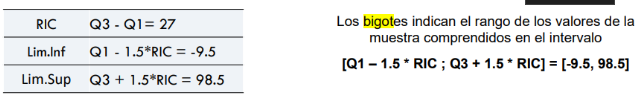

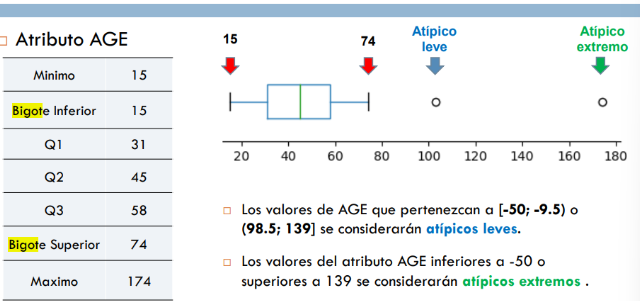

Primero debo calcular los limites superior e inferior

In [9]:
LI = Q1 - 1.5 * RIC
LS = Q3 + 1.5 * RIC

In [10]:
valores_dentro_del_rango = df[(df['Hallux'] >= LI) & (df['Hallux'] <= LS)]

bigote_sup = valores_dentro_del_rango['Hallux'].max()
bigote_inf = valores_dentro_del_rango['Hallux'].min()

print(f'El bigote superior es de {bigote_sup}')
print(f'El bigote inferior es de {bigote_inf}')

El bigote superior es de 44.7
El bigote inferior es de 9.6


NORMALIZACION UTILIZANDO MEDIA Y DESVIO

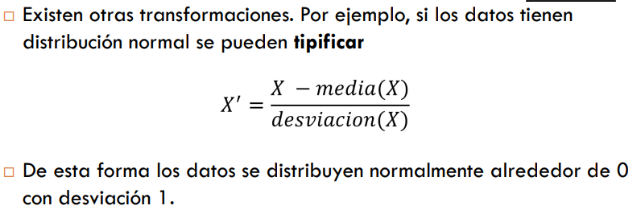

In [11]:
media = df['Hallux'].mean()
desvio = df['Hallux'].std()
df['Hallux'] = (df['Hallux'] - media) / desvio

In [12]:
df['Hallux'].describe()

count    4.470000e+02
mean     2.622809e-16
std      1.000000e+00
min     -1.528021e+00
25%     -1.004514e+00
50%      3.490573e-01
75%      5.377083e-01
max      9.828774e+00
Name: Hallux, dtype: float64

In [13]:
df['Hallux'].mean()

2.622808756161444e-16

In [14]:
Q1 = -1.0
Q3 = 5.37
RIC = Q3 - Q1
RIC

6.37

In [15]:
LI = Q1 - 1.5 * RIC
LS = Q3 + 1.5 * RIC

In [16]:
valores_dentro_del_rango = df[(df['Hallux'] >= LI) & (df['Hallux'] <= LS)]

bigote_sup = valores_dentro_del_rango['Hallux'].max()
bigote_inf = valores_dentro_del_rango['Hallux'].min()

print(f'El bigote superior es de {bigote_sup}')
print(f'El bigote inferior es de {bigote_inf}')

El bigote superior es de 9.828774238020436
El bigote inferior es de -1.5280210266864402


In [17]:
data = {
    'Medida': ['Media', 'Desvio', 'Minimo', 'Q1', 'Q2', 'Q3', 'RIC', 'Maximo', 'Bigote Inferior', 'Bigote Superior'], 
    'Sin normalizar': ['25.79', '10.6', '9.6','15.15', '29.5','31.5', '16.35', '130', '9.6', '44.7'],
    'Normalizado': ['2.62 ', '1.0 ', '-1.53', '-1.0', '3.49','5.37', '6.37', '9.82', '-1.528', '9.82']
}

df_tabla = pd.DataFrame(data)
df_tabla

,Medida,Sin normalizar,Normalizado
0,Media,25.79,2.62
1,Desvio,10.6,1.0
2,Minimo,9.6,-1.53
3,Q1,15.15,-1.0
4,Q2,29.5,3.49
5,Q3,31.5,5.37
6,RIC,16.35,6.37
7,Maximo,130,9.82
8,Bigote Inferior,9.6,-1.528
9,Bigote Superior,44.7,9.82


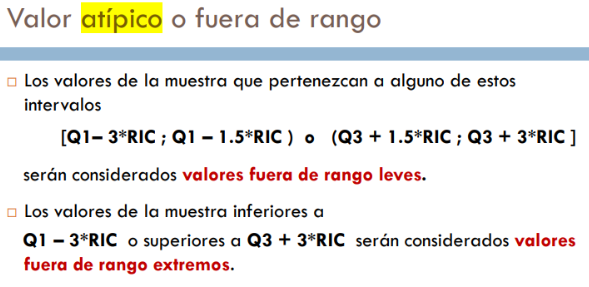

In [18]:
VALORES_FUERA_LEVES_EXT_INF = [Q1 - 3 * RIC , Q1 - 1.5 * RIC] #si un valor pertence a este intervalo se lo considera VALOR FUERA DE RANGO LEVE
VALORES_FUERA_LEVES_EXT_INF

[-20.11, -10.555]

In [19]:
VALOR_FUERA_LEVE_EXT_SUP = [Q3 + 1.5 * RIC, Q3 + 3 * RIC] #si un valor pertence a este intervalo se lo considera VALOR FUERA DE RANGO LEVE
VALOR_FUERA_LEVE_EXT_SUP

[14.925, 24.48]

Los valores de la muestra mayores a 24.48 y menores a -20.11 son considerados VALORES FUERA DE RANGO EXTREMOS

Compare los valores obtenidos e indique el valor de verdad de las siguientes afirmaciones:
1.  El valor de Q2 normalizado permite afirmar que la media y la mediana tienen valores cercanos.
- VERDADERO: ya que la media es de 2.62 y la mediana es de 3.49

2.  El máximo valor de Hallux se encuentra a más de 9 desvíos por encima de la media.
- VERDADERO: max=9, desvio=1

3.  Un hallux que mida más de 600 mm es considerado atípico extremo.
- VERDADERO, ya que supera a Q3 + 3 * RIC

4.  Un valor normalizado del atributo “hallux” de 2 se considerará un valor atípico extremo.
- FALSO, ya que esta dentro de los cuartiles

5.  En un gavilán es atípico que su hallux mida menos de 100 mm.
- No es atipico, ya que el bigote inferior normalizado es de -1.5